CNN Architectures
===========

LeNet
----

Convolution Layer : 2개  
Sub-Sampling Layer : 2개  
Fully Connected Layer : 2개  
Output Layer : 10개의 Class 구분  

In [1]:
import tensorflow as tf
from tensorflow import keras

# LeNet Model
def LeNet():
    model = keras.Sequential()
    # Conv 1 Layer
    model.add(keras.layers.Conv2D(filters=6, kernel_size=5, strides = 1, activation=tf.nn.relu, input_shape=(32, 32, 1)))
    
    # Sub Sampling Layer (Max Pooling)
    model.add(keras.layers.MaxPool2D(pool_size = 2, strides =2))
    
    # Conv 1 Layer
    model.add(keras.layers.Conv2D(filters=16, kernel_size=5, strides = 1, activation=tf.nn.relu, input_shape= (16, 16, 1)))
    
    # Sub Sampling Layer (Max Pooling)
    model.add(keras.layers.MaxPool2D(pool_size = 2, strides =2))
    
    # Fully Connected (FC) Layer와 연결하기 위한 Flatten
    model.add(keras.layers.Flatten())
    
    # FC1 Layer 
    model.add(keras.layers.Dense(120, activation=tf.nn.relu))
    # FC2 Layer
    model.add(keras.layers.Dense(84, activation=tf.nn.relu))
    
    # Output Softmax
    model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

    return model
    
lenet = LeNet()
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

AlexNet
------
 
Convolution Layer : 5개  
Fully Connected Layer : 3개  
ReLU Activation Function 적용  
Drop Out 적용  

In [2]:
import tensorflow as tf
from tensorflow import keras

# AlexNet Model
def AlexNet():
    # Sequential 모델 선언
    model = keras.Sequential()
    
    model.add(keras.layers.Conv2D(filters=96, kernel_size= 11, strides=4, padding='SAME', activation = tf.nn.relu, input_shape=(224,224,3)))
    model.add(keras.layers.MaxPooling2D(pool_size= 2, strides= 2, padding= 'SAME'))

    model.add(keras.layers.Conv2D(filters=256, kernel_size=5, strides=1, padding='SAME', activation = tf.nn.relu))
    model.add(keras.layers.MaxPooling2D(pool_size= 2, strides= 2, padding='SAME'))


    model.add(keras.layers.Conv2D(filters=384, kernel_size= 3, strides=1, padding='SAME', activation = tf.nn.relu))
    model.add(keras.layers.Conv2D(filters=384, kernel_size= 3, strides= 1, padding='SAME', activation = tf.nn.relu))
    model.add(keras.layers.Conv2D(filters=256, kernel_size= 3, strides= 3, padding='SAME', activation = tf.nn.relu))
    model.add(keras.layers.MaxPooling2D(pool_size= 2, strides= 2, padding='SAME'))

    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(4096, input_shape=(224*224*3,), activation = tf.nn.relu))
    model.add(keras.layers.Dropout(0.4))

    model.add(keras.layers.Dense(4096, activation = tf.nn.relu))
    model.add(keras.layers.Dropout(0.4))
    
    model.add(keras.layers.Dense(1000, activation = tf.nn.softmax))
    
    return model
    
alex = AlexNet()
alex.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 384)       885120    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 384)       1327488   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 256)        

VGGNet
-----------

Convolution Layer 13개  
Fully Connected Layer 3개  
5개의 conv block + 1개의 FC block

In [4]:
import tensorflow as tf
from tensorflow import keras

def VGG16():

    model = keras.Sequential()
    # 첫 번째 Conv Block
    # 입력 Shape는 ImageNet 데이터 세트의 크기와 같은 RGB 영상 (224 x 224 x 3)입니다.
    model.add(keras.layers.Conv2D(filters = 64, kernel_size = 3, activation= tf.nn.relu, padding= 'same', input_shape = (224, 224, 3)))
    model.add(keras.layers.Conv2D(filters = 64, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # 두 번째 Conv Block
    model.add(keras.layers.Conv2D(filters = 128, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.Conv2D(filters = 128, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # 세 번째 Conv Block
    model.add(keras.layers.Conv2D(filters = 256, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.Conv2D(filters = 256, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.Conv2D(filters = 256, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # 네 번째 Conv Block
    model.add(keras.layers.Conv2D(filters = 256, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.Conv2D(filters = 512, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.Conv2D(filters = 256, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # 다섯 번째 Conv Block
    model.add(keras.layers.Conv2D(filters = 512, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.Conv2D(filters = 512, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.Conv2D(filters = 512, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # Fully Connected Layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(4096, activation= tf.nn.relu))
    model.add(keras.layers.Dense(4096, activation= tf.nn.relu))
    model.add(keras.layers.Dense(1000, activation= tf.nn.softmax))
    
    return model

vgg16 = VGG16()
vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 256)      

GoogLeNet
------

***1. 다양한 feature 학습***  
Input Layer에 대해 크기가 다른 Convolution연산을 적용하여 다양한 Feature를 학습할 수 있도록 했습니다.  
  
***2. 1x1 convolution***  
연산량이 많아지는 것을 해결하기위해 1 x 1 Convolution을 통해 Feature Dimension을 감소시켰습니다.  
  
***3. Auxiliary Classifier***      
모델이 깊어짐에 따라 생기는 Gradient Vanishing 문제를 해결하기 위해 중간중간 Auxiliary Classifier를 달아 중간에서 Loss를 구할 수 있도록 했습니다.  
Auxiliary Classifier는 학습을 할 때만 덧붙이고 테스트를 할때에는 마지막 Classifier만 사용합니다.  

***4. Average Pooling***    
GoogleNet은 마지막 끝단에서 파라미터가 많은 FC layer를 제거하고 Average Pooling으로 학습된 값들을 평균을 냅니다.  
모델이 깊어지면서 Convolution Layer 연산만으로도 충분히 Feature를 학습했기 때문에 평균만을 구해도 충분히 성능이 나온다고 생각했기 때문입니다.  
실제로 GoogleNet은 FC layer를 제거함으로써 AlexNet보다 약 12배 적은 파라미터를 사용합니다.  
  
Inception module : 9개  
Auxiliary Classifier : 3개  
FC layer 대신 Average Pooling 사용  

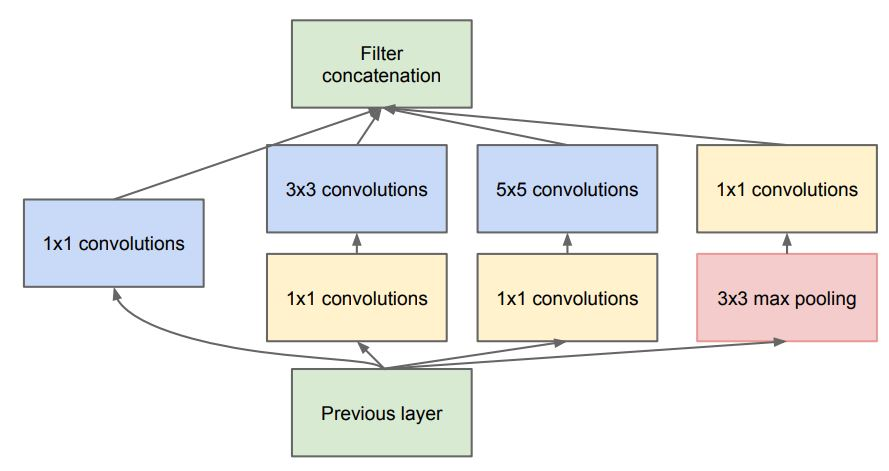

In [6]:
from PIL import Image
img = Image.open('pictures/Inception.JPG')
img

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Incetion 모듈 with 1 x 1 Convolution
def inception_block(input_layer, filter1, filter2, filter3, reduce1, reduce2, pool_proj):
    # 1 x 1 Convolution
    conv1x1 = Conv2D(filter1, kernel_size=(1,1), padding='same', activation='relu')(input_layer)
    
    # 1 x 1 Convolution 후 3 x 3 Convolution 
    conv3x3_reduce = Conv2D(reduce1, kernel_size=(1,1), padding='same', activation='relu')(input_layer)
    conv3x3 = Conv2D(filter2, kernel_size=(3,3), padding='same', activation='relu')(conv3x3_reduce)
    
    # 1 x 1 Convolution 후 5 x 5 Convolution 
    conv5x5_reduce = Conv2D(reduce2, kernel_size=(1,1), padding='same', activation='relu')(input_layer)
    conv5x5 = Conv2D(filter3, kernel_size=(5,5), padding='same', activation='relu')(conv5x5_reduce)
    
    #  Max pooling 후 1 x 1 Convolution
    pooling = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_layer)
    pool_proj = Conv2D(pool_proj, kernel_size=(1,1), padding='same', activation='relu')(pooling)
    
    # Feature map 합쳐주기
    output_layer = concatenate([conv1x1, conv3x3, conv5x5, pool_proj])
    
    return output_layer

# Gradient Vanishing Problem을 막기 위한 Auxiliary_classifier
def Auxiliary_classifier(input_layer, filter1, dense1, dense2, drop_prob):
    loss_ave_pool = AveragePooling2D(pool_size= 5, strides= 3)(input_layer)
    loss_conv = Conv2D(filter1, kernel_size = (1,1), padding='same', activation='relu', kernel_regularizer=l2(0.0002))(loss_ave_pool)
    loss_flat = Flatten()(loss_conv)
    loss_fc = Dense(dense1, kernel_regularizer=l2(0.0002), activation='relu')(loss_flat)
    loss_drop_fc = Dropout(drop_prob)(loss_fc)
    # 총 1000개의 클래스를 분류하기 때문에 마지막 node의 개수는 1000개입니다.
    loss_classifier = Dense(dense2, kernel_regularizer=l2(0.0002), activation='softmax')(loss_drop_fc)
    
    return loss_classifier

# 입력 선언
shape = (224,224,3)
inputs = Input(shape)

# 초기 입력의 크기를 줄이기 위한 Convolution Layer
conv_7x7 = Conv2D(64, kernel_size=(7,7), strides= (2,2), padding='same', activation='relu', kernel_regularizer=l2(0.0002))(inputs)
max_pool1 = MaxPooling2D((3,3), strides=(2,2), padding='same')(conv_7x7)
conv_3x3 = Conv2D(192, (3,3),strides=(1,1), padding='same', activation='relu', kernel_regularizer=l2(0.0002))(max_pool1)
max_pool2 = MaxPooling2D((3,3), strides=(2,2), padding='same')(conv_3x3)

# Inception 모듈을 쌓습니다.
inception_reduce_1 = inception_block(max_pool2, 64, 128, 32, 96, 16, 32)
inception_reduce_2 = inception_block(inception_reduce_1, 128, 192, 96, 128, 32, 64)

# Max Pooling Layer로 Feature map의 크기를 줄입니다.
max_pool3 = MaxPooling2D((3,3), strides=(2,2), padding='same')(inception_reduce_2)

# Inception 모듈을 쌓습니다.
inception_reduce_3 = inception_block(max_pool3, 192, 208, 48, 96, 16, 64)
inception_reduce_4 = inception_block(inception_reduce_3, 160, 224, 64, 112, 24, 64)

# 첫 번째 Auxiliary Classifier를 4번째 Inception 모듈 뒤에 넣어줍니다.
loss_classifier1 = Auxiliary_classifier(inception_reduce_4, 128, 1024, 1000, 0.7)

# Inception 모듈을 쌓습니다.
inception_reduce_5 = inception_block(inception_reduce_4, 128, 256, 64, 128, 24, 64)
inception_reduce_6 = inception_block(inception_reduce_5, 112, 288, 64, 144, 32, 64)
inception_reduce_7 = inception_block(inception_reduce_6, 256, 320, 128, 160, 32, 128)

# Max Pooling Layer로 Feature map의 크기를 줄입니다.
max_pool4 = MaxPooling2D((3,3), strides=(2,2), padding='same')(inception_reduce_7)

# 두 번째 Auxiliary Classifier를 7번째 Inception 모듈 뒤에 넣어줍니다.
loss_classifier2 = Auxiliary_classifier(inception_reduce_7, 128, 1024, 1000, 0.7)

# Inception 모듈을 쌓습니다.
inception_reduce_8 = inception_block(max_pool4, 256, 320, 128, 160, 32, 128)
inception_reduce_9 = inception_block(inception_reduce_8, 384, 384, 128, 192, 48, 128)

# Average Pooling Layer로 학습된 Feature들의 평균을 구해줍니다.
avg_pool = AveragePooling2D(pool_size= 7, strides= 1)(inception_reduce_9)
drop_out_layer = Dropout(0.4)(avg_pool)

# 마지막 최종 Class를 구분하기 위한 Classifier입니다.
loss_classifier3 = Dense(1000)(drop_out_layer)

# 작성한 GoogleNet 모델을 하나로 합쳐줍니다.
model = Model(inputs = inputs, outputs = [loss_classifier1,loss_classifier2,loss_classifier3])

# 모델 출력
model.summary()

W0729 18:10:55.720278 10080 nn_ops.py:4220] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0729 18:10:56.131145 10080 nn_ops.py:4220] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 56, 56, 64)   0           conv2d_20[0][0]                  
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 56, 56, 192)  110784      max_pooling2d_10[0][0]           
______________________________________________________________________________________________

ResNet
----

ResNet은 굉장히 깊은 층(최대 152-Layer)까지 쌓을 수 있는 모델입니다. 모델의 층이 깊어질수록 역전파 (Backpropagation) 시 기울기가 0으로 수렴해버려  
학습이 진행되지 않는Gradient Vanishing 현상이 발생합니다. 이러한 현상을 Degradation Problem이라고 합니다.  
ResNet은 Degradation problem을 완화하고 깊은 Layer를 가진 모델을 만들기 위해 ***Skip Connection***이란 ***Residual Learning***을 도입하였습니다.  

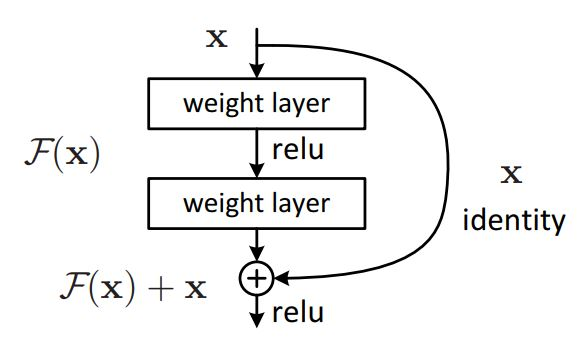

In [2]:
from PIL import Image
img = Image.open('pictures/Residual Block.JPG')
img

기존에는 H(x) - y를 얻기 위해 학습하였으나 ResNet에서는 F(x) = H(x) - y를 학습한다.  
결과적으로 출력은 H(x) = F(x) + y가 된다. 이런 식으로 잔차(Residual)를 학습하는 것을 **Residual Learning**이라고 한다.    
위의 그림에서 볼 수 있다시피 단순히 weight layer를 통해 나온 결과와 입력값을 더해 relu 활성화 함수를 적용한 것 뿐인데 성능이 좋아졌다.   
그 이유는 기존 network들은 H(x)를 얻기 위한 학습을 하였다면 ResNet은 F(x)가 0이 되는 방향으로 학습을 하기 때문이다.   
이는 곧 residual을 학습하는 것을 의미하며, 그렇기 때문에 ResNet이라고 불리게 된다. 또한 x가 그대로 **skip connection**이 되기 때문에 연산 증가가 없다. 
  
ResNet에서는 두 종류의 Residual block을 사용합니다. Residual block을 쌓아 굉장히 깊은 층의 모델을 만들어낸다.   
***Residual block*** : Feature map의 크기를 절반으로 줄이는 대신 Feature map의 Dimension을 2배로 늘리는 block입니다.    
Dimension을 맞추기 위해 1 x 1 Convolution을 사용한 block입니다. 이를 Projection Shortcut Connection 이라 합니다.  
  
***Identity block*** : 입력과 출력의 Dimension이 같은 경우에 사용합니다.  

In [1]:
ximport tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import add, Input,Dense,Activation, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model


# 입력과 출력의 Dimension이 같은 경우 사용합니다.
def identity_block(input_tensor, kernel_size, filters):
    
    filters1, filters2, filters3 = filters
    
    x = Conv2D(filters1, (1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1))(x)
    x = BatchNormalization()(x)
    
    # 입력(x) : input_tensor와 F(x) : x를 더해줍니다.
    # TODO : add()와 Activation() 메서드를 사용해서 relu(F(x) + x) 의 형태로 만들어보기
    x = add([x, input_tensor])
    x = Activation('relu')(x)
    return x


def residual_block(input_tensor, kernel_size, filters, strides=(2, 2)):
    filters1 , filters2 , filters3 = filters
    
    # 입력 Feature Map의 Size를 1/2로 줄이는 대신 Feature map의 Dimension을 2배로 늘려준다
    x = Conv2D(filters1, (1, 1), strides=strides)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1))(x)
    x = BatchNormalization()(x)
    
    # Projection Shortcut Connection을 구현해보기
    # 1 x 1 Convolution 연산을 수행하여 Dimension을 2배로 증가시키고 입력 Feature map의 size를 1/2로 축소시켜보기
    shortcut = Conv2D(filters3, (1, 1), strides=strides)(input_tensor)
    shortcut = BatchNormalization()(shortcut)

    # F(x) : x와 Shortcut Connection : shortcut을 더해줍니다.
    # add()와 Activation() 메서드를 사용해서 relu(F(x) + shortcut) 의 형태로 만들어보세요.
    x = add([x, shortcut])
    x = Activation('relu')(x)
    return x


def ResNet50():
    # 입력 이미지의 Shape을 정해줍니다.
    shape = (224,224,3)
    inputs = Input(shape)
    
    # 입력 영상의 크기를 줄이기 위한 Conv & Max-pooling
    x = ZeroPadding2D((3, 3))(inputs)
    x = Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    
    # 첫 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [64, 64, 256], strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256])
    x = identity_block(x, 3, [64, 64, 256])
    
    
    # 두 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    
    # 세 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    
    # 네 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [512, 512, 2048])
    x = identity_block(x, 3, [512, 512, 2048])
    x = identity_block(x, 3, [512, 512, 2048])

    # 마지막단에서 FC layer를 쓰지 않고 단순히 Averaging 합니다.
    x = AveragePooling2D((7, 7))(x)
    x = Flatten()(x)
    # 1000개의 Class 구분
    x = Dense(1000, activation='softmax')(x)
    
    # 모델 구성
    model = Model(inputs, x)
    return model

model = ResNet50()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         conv2d[0][0]                     
______________________________________________________________________________________________